# Linhagem Huh7

# Importações estruturação dos dados

In [1]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#organizando os arquivos de forma aleatória
import random
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg

# Importação do modelo de CNN

In [2]:
#modelo de revisão redes neurais - cnn
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

2022-08-05 18:45:02.852898: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 18:45:02.853008: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
diretorio = '/data/results/results_Huh7' #alimentando a variável com os arquivos da pasta datasets
lista_dados = os.listdir(diretorio) #listando os arquivos dessa pasta
printLis(lista_dados) #printando as diferentes listas

-------------
-=< Lista >=-
-------------
0 -> 10_images_de_X_test_huh7_melhor_modelo_500_epochs_2022-6-30.gz
1 -> 11_images_de_y_test_huh7_melhor_modelo_500_epochs_2022-6-30.gz
2 -> 12_lista_img_camp_clar_100_resized_regressao_huh7_samehuh72021-10-25.gz
3 -> 13_lista_rotulo_camp_clar_100_resized_regressao_huh7_samehuh72021-10-25.gz
4 -> 14_model__huh7_regressao_MAIOR_erro_Mean_squared_error_500_epochs2022-6-30.h5
5 -> 15_images_de_X_test_huh7_PIOR_modelo_500_epochs_2022-6-30.gz
6 -> 16_images_de_y_test_huh7_PIOR_modelo_500_epochs_2022-6-30.gz
7 -> 1_lista_img_camp_clar_100_resized_regressao_huh72021-11-9.gz
8 -> 2_lista_img_camp_clar_75_resized_regressao_HUH72021-11-9.gz
9 -> 3_lista_img_camp_clar_50_resized_regressao_HUH72021-11-9.gz
10 -> 4_lista_img_camp_clar_25_resized_regressao_HUH72021-11-9.gz
11 -> 5_lista_rotulo_camp_clar_100_resized_regressao_huh72021-11-9.gz
12 -> 6_lista_rotulo_camp_clar_75_resized_regressao_HUH72021-11-9.gz
13 -> 7_lista_rotulo_camp_clar_50_resized_regress

Para regressão, foi salvo 284 imagens a partir de 71 imagens originais

In [4]:
#lista same Huh7
imagem_camp_claro = joblib.load(diretorio+ '/' + lista_dados[2])
imagem_camp_claro.shape #apresentando 4000 imagens de 108x108, 3 rgb

(176, 200, 200, 3)

## x = características/imagens

In [5]:
#somando cada lista gerada acima e salvando em um array
x = np.asarray(imagem_camp_claro) #abriando em array as imagens
x.shape #x - características (labels) 

(176, 200, 200, 3)

Vamos definir nossos rótulos (y)

## y = rótulos

Abrindo os rótulos que foram salvos na preparação das imagens

In [6]:
#rotulo same Huh7
y_rotulo = joblib.load(diretorio+ '/' + lista_dados[3]) #carregando os rotulos
y = np.asarray(y_rotulo)
y.shape

(176,)

In [ ]:
#Train and test split datasets for CNN model
#função que separa as imagens em teste e treino
from sklearn.model_selection import train_test_split

Separação de teste e treino a partir de uma biblioteca.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#variáveis recebem o número de imagens para tes e treino
print(f'{X_train.shape} \n{X_test.shape} \n{y_train.shape} \n{y_test.shape}')

(123, 200, 200, 3) 
(53, 200, 200, 3) 
(123,) 
(53,)


In [ ]:
#joblib.dump(X_train, './../../results/3_images_de_X_train_huh7_pior_modelo.gz')

['/content/drive/MyDrive/1_Informações_scripts//3_images_de_X_train_huh7_pior_modelo.gz']

In [ ]:
#joblib.dump(y_train, './../../results/3_images_de_y_train_huh7_pior_modelo.gz')

['/content/drive/MyDrive/1_Informações_scripts//3_images_de_y_train_huh7_pior_modelo.gz']

In [ ]:
#joblib.dump(X_test, './../../results/4_images_de_X_test_huh7_pior_modelo.gz')

['/content/drive/MyDrive/1_Informações_scripts//4_images_de_X_test_huh7_pior_modelo.gz']

In [ ]:
#joblib.dump(y_test, './../../results/4_images_de_y_test_huh7_pior_modelo.gz')

['/content/drive/MyDrive/1_Informações_scripts//4_images_de_y_test_huh7_pior_modelo.gz']

Para treinar o modelo, geralmente é selecionada 30% das imagens para o treino e 70% para teste. Para isso, as imagens são guardadas em uma variável de teste (somente 30%) e o restante vai para o treino.

### Determinação do modelo

In [ ]:
modelo = Sequential()
modelo.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
#função de ativação relu é muito utilizado para problemas de regressão
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(64, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(128, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(256, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Flatten())
modelo.add(Dropout(0.9))
modelo.add(Dense(1, activation='linear'))
#apenas uma saída e de forma linear
modelo.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

Após correr o modelo de Redes Neurais, vamos treina-lo em algumas rodadas e verificar a acurácia.

Guardando&nbsp;em&nbsp;uma&nbsp;variável&nbsp;o&nbsp;treinamento&nbsp;do&nbsp;modelo&nbsp;-&nbsp;informando&nbsp;as&nbsp;imagens&nbsp;com&nbsp;as&nbsp;caracteristicas (X_treino) e junto a elas os rótulos, validando com os valores de teste em 10 rodadas

In [ ]:
#rodadas de treinamento
history = modelo.fit(
                        X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=12
                    )

Epoch 1/50
11/11 [==============================] - 13s 1s/step - loss: 255035.3281 - mean_absolute_error: 391.8499 - val_loss: 102324.8359 - val_mean_absolute_error: 216.6875
Epoch 2/50
11/11 [==============================] - 12s 1s/step - loss: 97868.1641 - mean_absolute_error: 236.9522 - val_loss: 100913.2578 - val_mean_absolute_error: 216.0422
Epoch 3/50
11/11 [==============================] - 13s 1s/step - loss: 74585.6875 - mean_absolute_error: 209.7563 - val_loss: 103213.9609 - val_mean_absolute_error: 228.8837
Epoch 4/50
11/11 [==============================] - 12s 1s/step - loss: 68159.1484 - mean_absolute_error: 199.5978 - val_loss: 97399.3203 - val_mean_absolute_error: 213.5029
Epoch 5/50
11/11 [==============================] - 12s 1s/step - loss: 72438.8125 - mean_absolute_error: 186.1348 - val_loss: 91283.8047 - val_mean_absolute_error: 205.0888
Epoch 6/50
11/11 [==============================] - 12s 1s/step - loss: 63286.5625 - mean_absolute_error: 194.9223 - val_loss:

In [ ]:
#data = timeProcess()[1]
#modelo.save('./../../results/model__huh7_regressao_maior_erro'+data+'.h5')

## Avaliação da Acurácia

Existem algumas maneiras de se avaliar a acurácia dos algoritmos, para algoritmo de regressão, as métricas mais comuns são Erro médio absoluto (MSE) não se baseia na média a partir de valores discrepantes. Erro Médio quadrático (MAE) considera os valores discrepantes entre as variáveis, apontando maior erro.

O algoritmo avalia o valor previsto e subtraí pelo valor conhecido, depois é calculado a média entre cada valor.

In [ ]:
# #salvando o modelo
# data = timeProcess()[1]
# modelo.save('arquivos_text_modelo_imagens//model_camp_claro_A549_regressao'+data+'.h5')

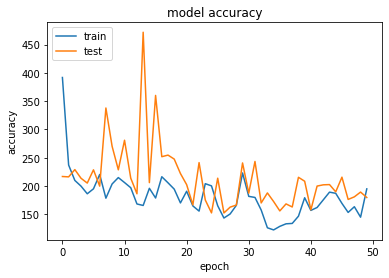

In [ ]:
#gráfico avaliando a acurácia a partir de treino e teste
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.savefig(
    fname="/results/CNN_Huh7_Greatest_error.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

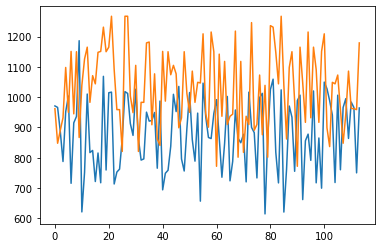

In [ ]:
#avaliando a previsão do modelo com os rótulos
prev = modelo.predict(X_test)
plt.plot(prev)
plt.plot(y_test)
plt.show()

In [ ]:
# Qualit model analisys
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

In [ ]:
#buscando pelas métricas
print(f"{round(r2_score(y_test, prev) * 100, 2)}% r2_score") #raíz quadrada
print(f"{round(mean_absolute_error(y_test, prev), 2)} Erro médio absoluto") 
print(f"{round(mean_squared_log_error(y_test, prev), 2)} Erro médio quadrático") #erro médio quadrático
# print(f"{round(median_absolute_error(y_test, prev), 2)}")#Erro médio absoluto sem %



-209.95% r2_score
193.86 Erro médio absoluto
0.06 Erro médio quadrático


In [ ]:
mean_absolute_error(y_test, prev)

193.85687255859375

In [ ]:
print(f"{round(mean_absolute_error(y_test, prev), 2)}") #erro médio absoluto


193.86


In [ ]:
print(f"{round(mean_squared_log_error(y_test, prev), 2)}") #erro médio quadrático


0.06
